In [45]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import openpiv.preprocess
import PIL
import os
import numpy
import cv2
import skimage
import matplotlib.pyplot
%matplotlib inline
import IPython.display #HTML
import pylab
import scipy
from __future__ import division
import progressbar

In [2]:
%%bash
ls ./gr2/run8/PicturesPNGRaw/Picture*.png

./gr2/run8/PicturesPNGRaw/Picture001.png
./gr2/run8/PicturesPNGRaw/Picture002.png
./gr2/run8/PicturesPNGRaw/Picture003.png
./gr2/run8/PicturesPNGRaw/Picture004.png
./gr2/run8/PicturesPNGRaw/Picture005.png
./gr2/run8/PicturesPNGRaw/Picture006.png
./gr2/run8/PicturesPNGRaw/Picture007.png
./gr2/run8/PicturesPNGRaw/Picture008.png
./gr2/run8/PicturesPNGRaw/Picture009.png
./gr2/run8/PicturesPNGRaw/Picture010.png
./gr2/run8/PicturesPNGRaw/Picture011.png
./gr2/run8/PicturesPNGRaw/Picture012.png
./gr2/run8/PicturesPNGRaw/Picture013.png
./gr2/run8/PicturesPNGRaw/Picture014.png
./gr2/run8/PicturesPNGRaw/Picture015.png
./gr2/run8/PicturesPNGRaw/Picture016.png
./gr2/run8/PicturesPNGRaw/Picture017.png
./gr2/run8/PicturesPNGRaw/Picture018.png
./gr2/run8/PicturesPNGRaw/Picture019.png
./gr2/run8/PicturesPNGRaw/Picture020.png
./gr2/run8/PicturesPNGRaw/Picture021.png
./gr2/run8/PicturesPNGRaw/Picture022.png
./gr2/run8/PicturesPNGRaw/Picture023.png
./gr2/run8/PicturesPNGRaw/Picture024.png
./gr2/run8/Pictu

In [3]:
%%bash 
zero=0
for x in ./gr2/run8/PicturesPNGRaw/Picture??.png
do
    #echo ${x%${x:(-6)}}$zero${x:(-6)}
    mv -f $x ${x%${x:(-6)}}$zero${x:(-6)}
done
for x in ./gr2/run8/PicturesPNGRaw/Picture?.png
do
    #echo ${x%${x:(-5)}}$zero$zero${x:(-5)}
    mv -f $x ${x%${x:(-5)}}$zero$zero${x:(-5)}
done

mv: target './gr2/run8/PicturesPNGRaw/Picture099.png' is not a directory
mv: target './gr2/run8/PicturesPNGRaw/Picture009.png' is not a directory


In [13]:
import os
runnr = 8
os.system("ffmpeg -framerate 12 -i ./gr2/run8/PicturesPNGRaw/Picture%3d.png -s:v 1728:2400 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p movie8.mp4")

0

In [2]:
IPython.display.HTML("""<video width='480' height='480' controls>
    <source src='movie8.mp4'>
    Your browser does not support the video tag.
</video>
""")

In [3]:
%%html
    <video width='480' height='480' controls="">
        <source src='movie8.mp4'>
        Your browser does not support the video tag.
    </video>

Capture time: 5 s
Capture: 50 (frame rate, images per second) for 251 frames in 5 seconds
Gain: 6000
Shutter speed: 50

CMOS camera, with 2400 x 1700 pixel resolution at 168 fps

In [4]:
picnr = 118   #or 083 , 190, 224
runnr = 8    #10, 11, 12
path1 = 'gr2/run'+str(runnr)+'/PicturesPNGRaw/Picture'+str(picnr)+'.png'
path2 = 'gr2/run'+str(runnr)+'/PicturesPNGRaw/Picture'+str(picnr+1)+'.png'
dt =  5/251# time separation between pictures = Capture time/number_of_pictures
dt

0.0199203187250996

In [29]:
!ls ./gr2

run1  run10  run11  run12  run4  run5  run7  run8


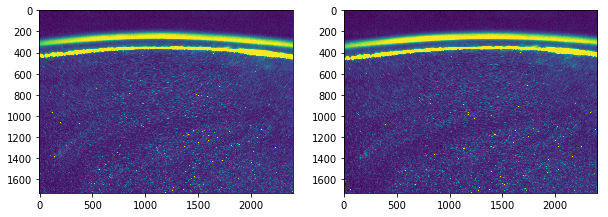

In [11]:
img1 = openpiv.tools.imread(path1)
img2 = openpiv.tools.imread(path2)
fig = matplotlib.pyplot.figure(figsize=[10,10])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img2)

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1152x720 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc34dd0b400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc34db2efd0>], dtype=object))

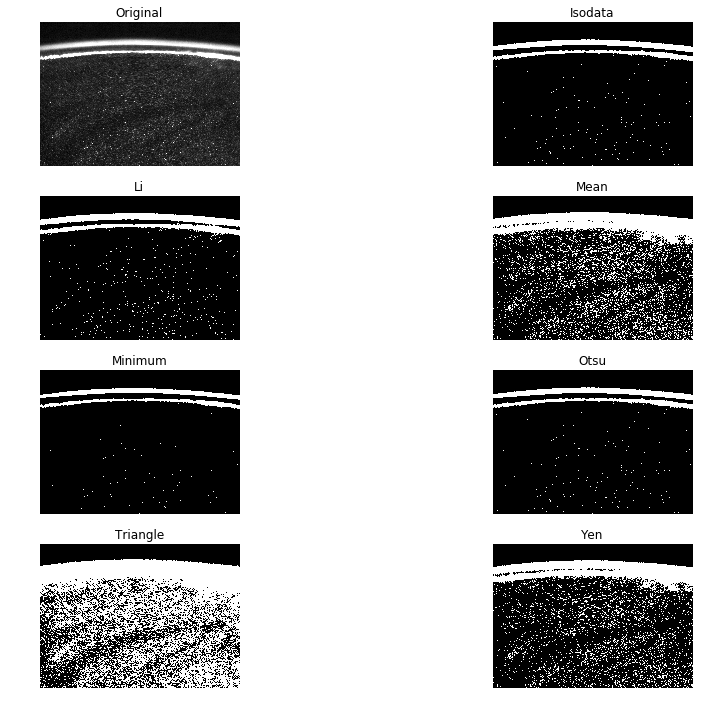

In [12]:
img_gray = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)  # As grayscale
skimage.filters.try_all_threshold(img_gray.astype(numpy.int32),figsize=(16, 10), verbose=True)

In [26]:
mask1.shape

(1728, 2400)

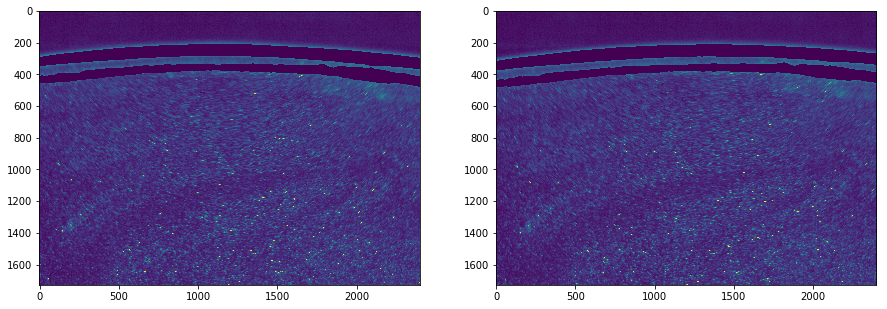

In [32]:
mask1= openpiv.preprocess.dynamic_masking(img1.astype(numpy.int32), method='intensity',filter_size=10,threshold=0.005)
mask2= openpiv.preprocess.dynamic_masking(img2.astype(numpy.int32), method='intensity',filter_size=10,threshold=0.005)
fig = matplotlib.pyplot.figure(figsize=[15,10])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mask1)
#matplotlib.pyplot.savefig('mask1dynamic_8.jpg', dpi= 'figure')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask2)

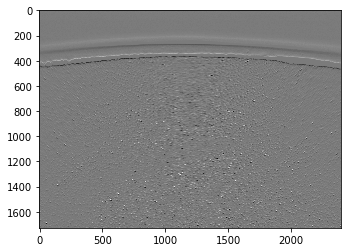

In [9]:
input_image=cv2.imread(path1)
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
matplotlib.pyplot.imshow(sobely,cmap = 'gray');
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference

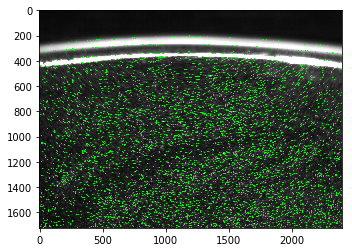

In [13]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur
edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(gray, th1, th2)
edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green
matplotlib.pyplot.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB));

## Masking with opencv (cv2) - image processing package: 
### Segmentation by thresholding (region based segmentation) & filtering with Otsu's method (foreground from background)

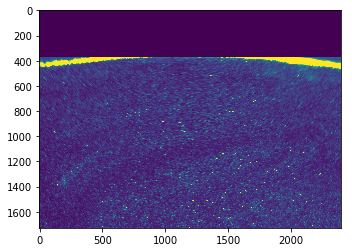

True

In [33]:
mask = numpy.zeros(img1.shape, dtype = "uint8")
cv2.rectangle(mask, (0,369), (img1.shape[1], img1.shape[0]), (255, 255, 255), -1) 
maskedImg1 = cv2.bitwise_and(img1, mask)
#mask_ = numpy.zeros(img1.shape, dtype = "uint8")
matplotlib.pyplot.imshow(maskedImg1)
matplotlib.pyplot.show()
cv2.imwrite('masked'+str(runnr)+'Img1.jpg',maskedImg1)

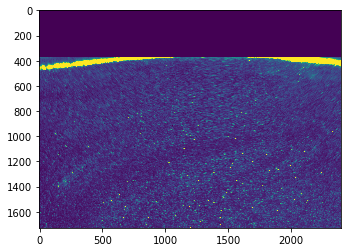

True

In [34]:
mask2 = numpy.zeros(img2.shape, dtype = "uint8")
cv2.rectangle(mask2, (0,369), (img1.shape[1], img1.shape[0]), (255, 255, 255), -1)  
maskedImg2 = cv2.bitwise_and(img2, mask2)
matplotlib.pyplot.imshow(maskedImg2)
matplotlib.pyplot.show()
cv2.imwrite('masked'+str(runnr)+'Img2.jpg',maskedImg2)

In [40]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
    # mouse callback function

def draw_circle(event,x,y,flags,param):
        global ix,iy,drawing,mode
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            ix,iy = x,y
        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing == True:
                if mode == True:
                    cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
                else:
                    cv2.circle(img1,(x,y),5,(0,0,0),-1)
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            if mode == True:
                cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
            else:
                cv2.circle(img1,(x,y),5,(0,0,0),-1)
    
img1 = cv2.imread('masked'+str(runnr)+'Img1.jpg')
img1 = cv2.imread('mask'+str(runnr)+'-img1.jpg')

cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)
while(1):  #while True
        cv2.imshow('image',img1)
        k = cv2.waitKey(20) & 0xFF
        if k == 27: # ESC on keyboard closes the window
            cv2.destroyAllWindows()
            break
        elif k == ord('m'):
            mode = not mode
        elif k == ord('s'):  #if "s" is pressed on the keyboard,  
            cv2.imwrite('mask'+str(runnr)+'-img1.jpg', img1)  #the resulting drawing is saved
            cv2.destroyAllWindows()                         #and the window is closed
            break
cv2.destroyAllWindows()

In [41]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
    # mouse callback function

def draw_circle(event,x,y,flags,param):
        global ix,iy,drawing,mode
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            ix,iy = x,y
        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing == True:
                if mode == True:
                    cv2.rectangle(img2,(ix,iy),(x,y),(0,0,0),-1)
                else:
                    cv2.circle(img2,(x,y),5,(0,0,0),-1)
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            if mode == True:
                cv2.rectangle(img2,(ix,iy),(x,y),(0,0,0),-1)
            else:
                cv2.circle(img2,(x,y),5,(0,0,0),-1)
    
img1 = cv2.imread('masked'+str(runnr)+'Img2.jpg')
img1 = cv2.imread('mask'+str(runnr)+'-img2.jpg')

cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)
while(1):  #while True
        cv2.imshow('image',img2)
        k = cv2.waitKey(20) & 0xFF
        if k == 27: # ESC on keyboard closes the window
            cv2.destroyAllWindows()
            break
        elif k == ord('m'):
            mode = not mode
        elif k == ord('s'):  #if "s" is pressed on the keyboard,  
            cv2.imwrite('mask'+str(runnr)+'-img2.jpg', img2)  #the resulting drawing is saved
            cv2.destroyAllWindows()                         #and the window is closed
            break
cv2.destroyAllWindows()

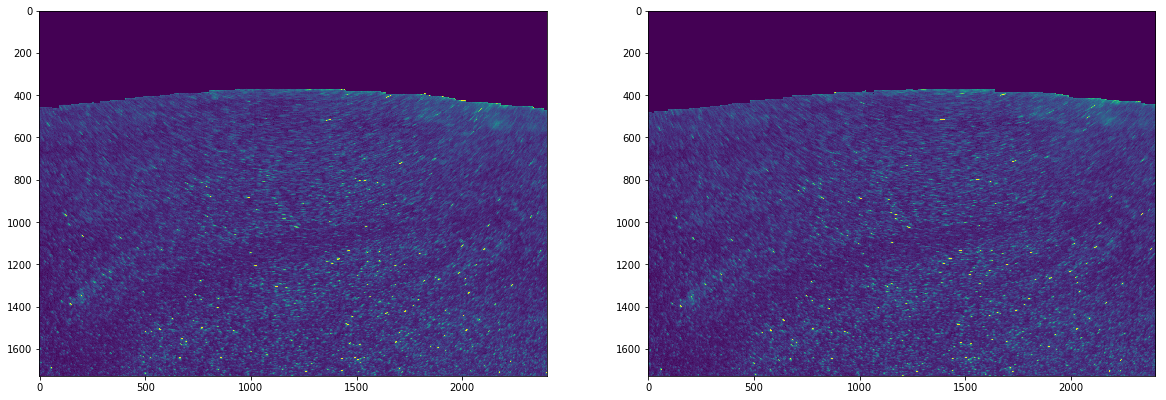

In [15]:
mask1 = cv2.imread('mask'+str(runnr)+'-img1.jpg', cv2.IMREAD_GRAYSCALE) 
mask2 = cv2.imread('mask'+str(runnr)+'-img2.jpg', cv2.IMREAD_GRAYSCALE) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mask1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask2);

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


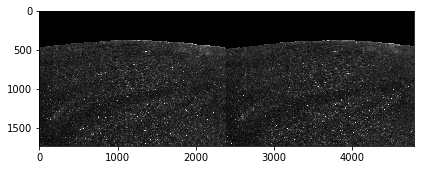

In [36]:
fig1 = skimage.img_as_uint(skimage.color.rgb2gray(mask1))
fig2 = skimage.img_as_uint(skimage.color.rgb2gray(mask2))
skimage.io.imshow(numpy.c_[fig1,fig2]);

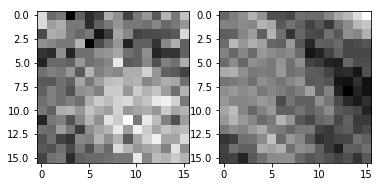

In [85]:
ia = mask1[550:566,550:566].copy()
ib = mask2[550:566,550:566].copy()
# just for the test, you can try also a "known" result
# ib = roll(ia,2,axis=1).copy()
matplotlib.pyplot.figure()
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.imshow(ia,cmap=matplotlib.pyplot.cm.gray)
matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.imshow(ib,cmap=matplotlib.pyplot.cm.gray);

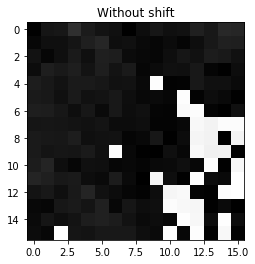

In [86]:
matplotlib.pyplot.imshow(ib-ia,cmap=matplotlib.pyplot.cm.gray)
matplotlib.pyplot.title('Without shift');

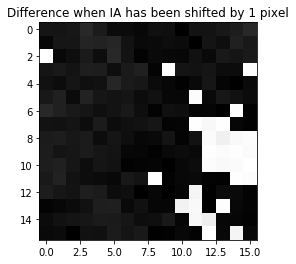

In [87]:
matplotlib.pyplot.imshow(ib-pylab.roll(ia,1,axis=0),cmap=matplotlib.pyplot.cm.gray)
matplotlib.pyplot.title('Difference when IA has been shifted by 1 pixel');

In [95]:
def match_template(img, template,maxroll=8):
    mindist = float('inf')
    idx = (-1,-1)
    for y in range(maxroll):
        for x in range(maxroll):
        #calculate Euclidean distance
            dist = pylab.sqrt(pylab.sum(pylab.square(template - pylab.roll(pylab.roll(img,x,axis=0),y,axis=1))))
            if dist < mindist:
                mindist = dist
                idx = (x,y)
                
    return [mindist, idx]
# let's test that it works indeed by manually rolling (shifting circurlarly) the same image
match_template(ia,pylab.roll(ia,2,axis=0))

[0.0, (2, 0)]

In [96]:
# indeed, when we find the correct shift, we got zero distance. it's not so in real images:
mindist, idx = match_template(ib,ia)
print('Minimal distance = %f' % mindist)
print('idx = %d, %d' % idx)

Minimal distance = 142.481578
idx = 7, 7


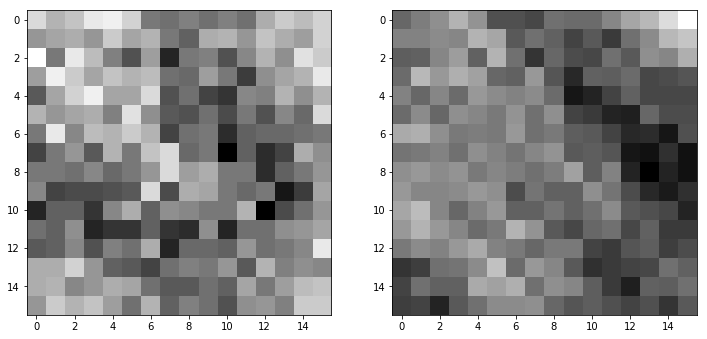

In [97]:
matplotlib.pyplot.figure(figsize=(12,10))
matplotlib.pyplot.subplot(1,2,1)
matplotlib.pyplot.imshow(pylab.roll(pylab.roll(ia,idx[0],axis=0),idx[1],axis=1),cmap=matplotlib.pyplot.cm.gray)
matplotlib.pyplot.subplot(1,2,2)
matplotlib.pyplot.imshow(ib,cmap=matplotlib.pyplot.cm.gray);

In [98]:
c = scipy.signal.correlate2d(ia-ia.mean(),ib-ib.mean())
# not it's twice bigger than the original windows, as we can shift ia by maximum it's size horizontally and vertically
print('Size of the correlation map %d x %d' % c.shape)

Size of the correlation map 31 x 31


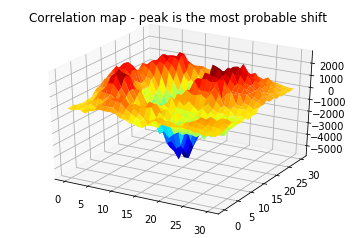

In [99]:
# let's see how the correlation map looks like:
fig = matplotlib.pyplot.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
cx,cy = numpy.meshgrid(range(c.shape[0]), range(c.shape[1]))

ax.plot_surface(cx,cy,c,cmap=matplotlib.pyplot.cm.jet, linewidth=0.2)
matplotlib.pyplot.title('Correlation map - peak is the most probable shift');

19 13


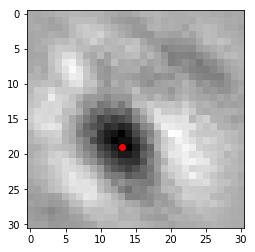

In [100]:
# let's see the same correlation map, from above
matplotlib.pyplot.imshow(c, cmap='gray')
i,j = numpy.unravel_index(c.argmin(), c.shape)
print( i,j)
#matplotlib.pyplot.hold(True)
matplotlib.pyplot.plot(j,i,'ro');

In [101]:
iw = 16
x,y,u,v = [],[],[],[]
for k in range(0,mask1.shape[0],iw):
    for m in range(0,mask1.shape[1],iw):
        ia = mask1[k:k+iw,m:m+iw]
        ib = mask2[k:k+iw,m:m+iw]
        c = scipy.signal.correlate2d(ia-ia.mean(),ib-ib.mean())
        i,j = numpy.unravel_index(c.argmin(), c.shape)
        x.append(k-iw/2.)
        y.append(m-iw/2.)
        u.append(i - iw/2.-1)
        v.append(j - iw/2.-1)

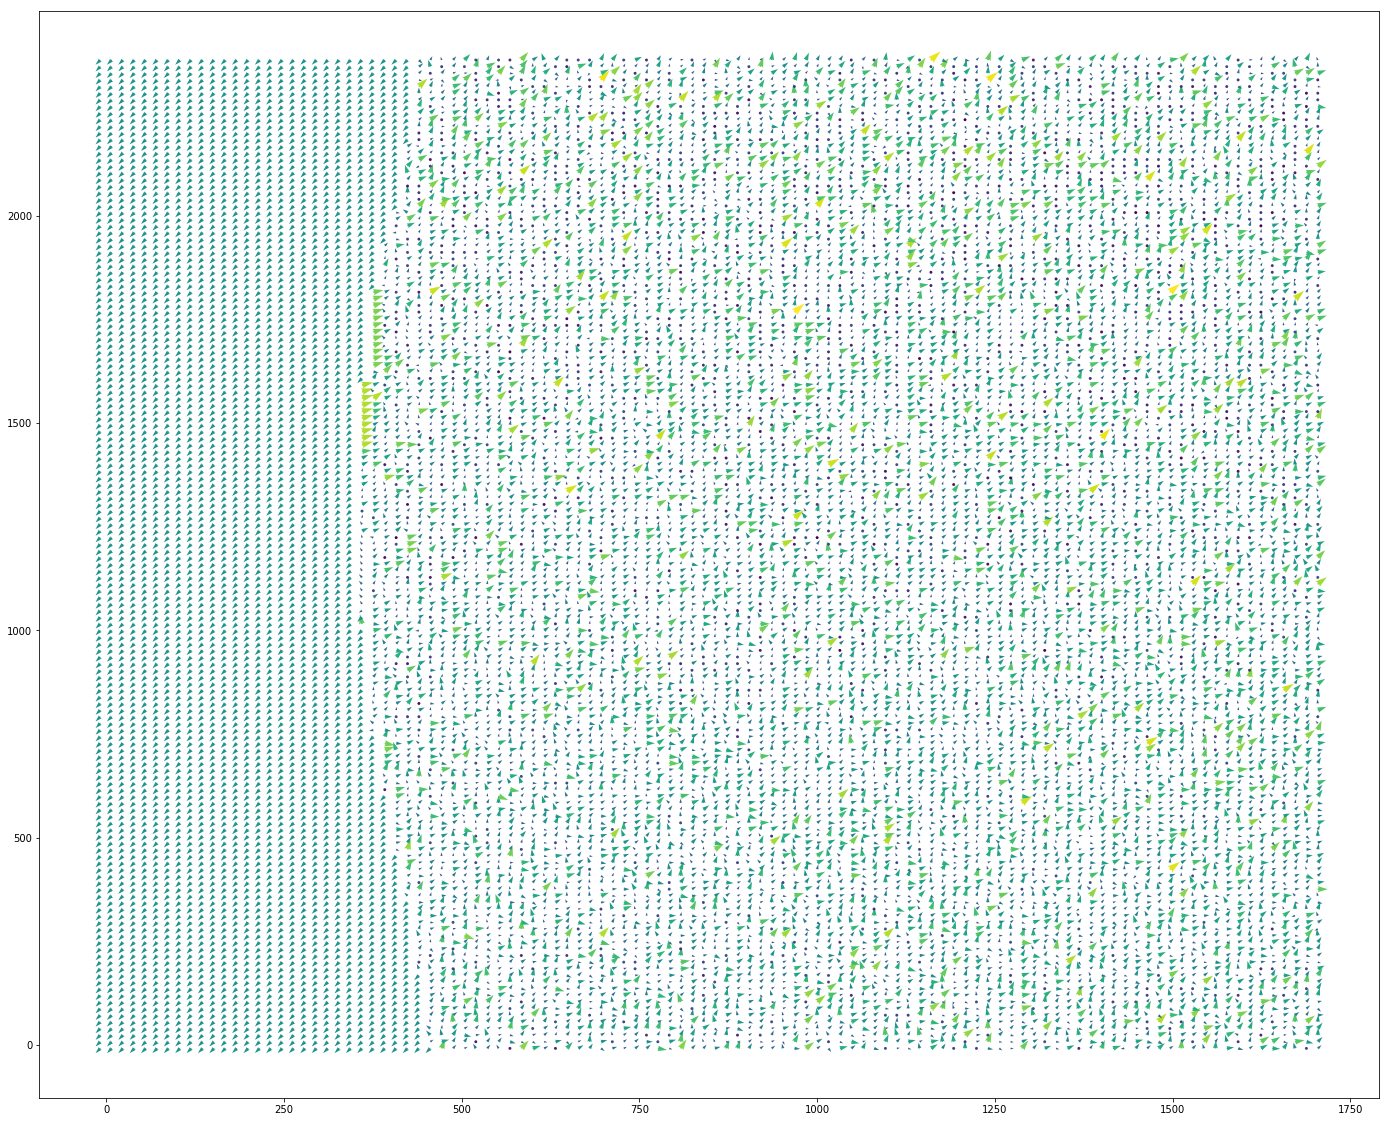

In [102]:
matplotlib.pyplot.figure(figsize=(24,20))
M = numpy.sqrt(pow(numpy.array(u), 2) + pow(numpy.array(v), 2))
matplotlib.pyplot.quiver(x,y,u,v,M);

In [18]:
print(fig1.astype(numpy.int32))
#openpiv.process.WiDIM?

[[    0     0     0 ...,     0     0     0]
 [    0     0     0 ...,     0     0     0]
 [    0     0     0 ...,     0     0     0]
 ..., 
 [ 5654  3855  3084 ..., 10280  9766 13364]
 [ 3855  4112  3084 ...,  7453 11565 15163]
 [ 3084  2827  4626 ...,  9766 10023 21074]]


In [83]:
openpiv.process.WiDIM?

In [104]:
#openpiv.process.WiDIM?
window_size=32 #40   the size of the interrogation window on first image, in pixels
search_areasize = 64  #80    size of the (square) interrogation window from the second frame, in pixels
overlap = 16  #20  the number of pixels by which two adjacent windows overlap.
#u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
x,y,u,v, mask = WiDIM(fig1.astype(numpy.int32), fig2.astype(numpy.int32), 
                                       (fig1>0).astype(numpy.int32), min_window_size=16, 
                                      overlap_ratio=0.25, coarse_factor=2, dt=dt, 
                                      validation_method='mean_velocity', trust_1st_iter=1, 
                                      validation_iter=2, 
                                      tolerance=0.7, 
                                      nb_iter_max=4, sig2noise_method='peak2peak')
#,subpixel_method= 'gaussian')

x, y = openpiv.process.get_coordinates(image_size=mask1.shape, window_size=window_size, 
                                       overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
#matplotlib.pyplot.scatter(x, y, color='r', s=2)
name= 'primeira-run'+str(runnr)+'.pdf'
fig.savefig(name)   
matrivb = numpy.nonzero(numpy.sqrt(u**2 + v**2))
matrivb[1].size

NameError: name 'WiDIM' is not defined

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


12389

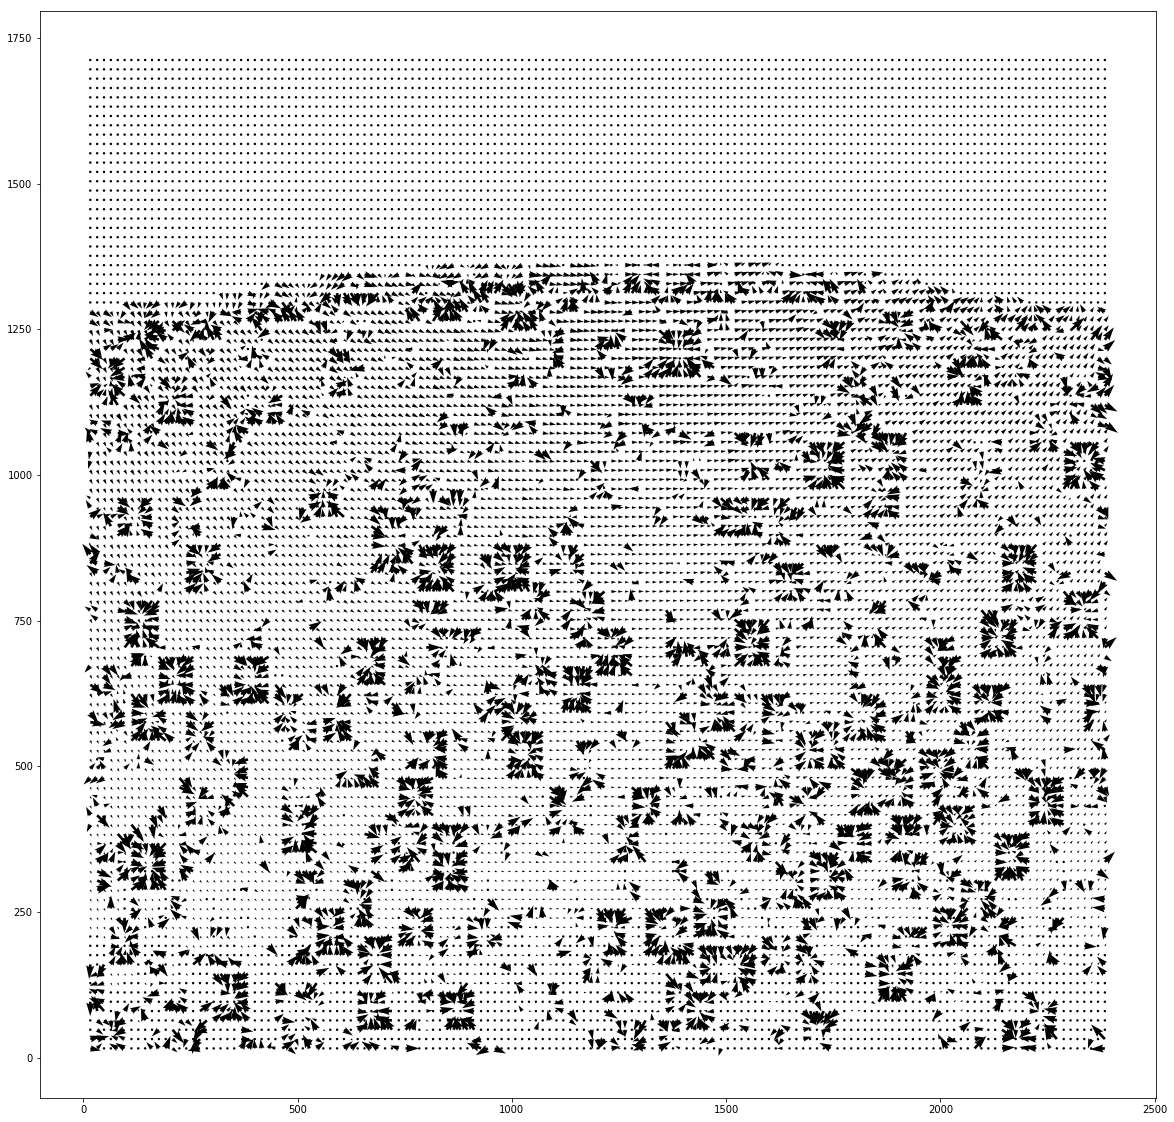

In [60]:
window_size=32 #40   the size of the interrogation window on first image, in pixels
search_areasize = 90  #80    size of the (square) interrogation window from the second frame, in pixels
overlap = 16  #20  the number of pixels by which two adjacent windows overlap.
u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
                                                           mask2.astype(numpy.int32),
                                                           window_size=window_size,    #24
                                                           overlap=overlap, dt=dt, #12
                                                           search_area_size=search_areasize,
                                                           #subpixel_method= 'gaussian',
                                                           sig2noise_method='peak2peak' ) 
x, y = openpiv.process.get_coordinates(image_size=mask1.shape, window_size=window_size, 
                                       overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
#matplotlib.pyplot.scatter(x, y, color='r', s=2)
name= 'primeira-run'+str(runnr)+'.pdf'
fig.savefig(name)   
matrivb = numpy.nonzero(numpy.sqrt(u**2 + v**2))
matrivb[1].size

In [58]:
sig2noise.min()

1.0

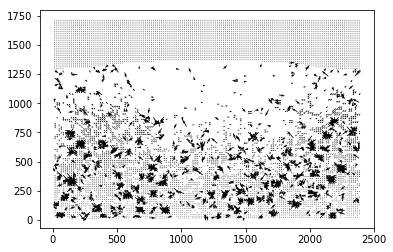

In [61]:
u1, v1, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.1)#1.3
#u1, v1, mask = openpiv.validation.global_val( u, v, (-55000, 15000), (-15000, 15000) )
matplotlib.pyplot.quiver( x, y, u1, v1 )

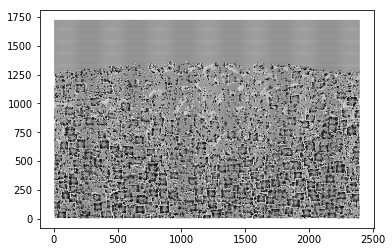

In [56]:
u2, v2 = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=3,  kernel_size = 3 ) #tol= 0.0001,
matplotlib.pyplot.quiver( x, y, u2, v2 )

# Define matching reference points in world coordinate

In [62]:
#[wx,wy] = ndgrid((0:5:20),(-5:-5:-10));    # same as matlab ndgrid:
n_x= 3    #number of points in x axis
n_y = 5   # number of points in y axis
first_x = 0
last_x = 20
first_y = -1.5+ (-3.3333)*4#-10
last_y = -1.5#-5
import cmath 
#foo = n_x*cmath.sqrt(-1)
world1 = numpy.zeros((n_x*n_y,3), numpy.float32)  #numpy.zeros((6*7,3), numpy.float32)
#print(world)
world1[:,:2] = numpy.mgrid[first_x : last_x :n_x*cmath.sqrt(-1), first_y : last_y : n_y*cmath.sqrt(-1)].T.reshape(-1,2)
#print(world1)
#number of points = n_x*n_y

world = world1
#world= list(zip( world1[:,0], world1[:,1]))
world = world.astype('float32')
world

array([[  0.        , -14.83320045,   0.        ],
       [ 10.        , -14.83320045,   0.        ],
       [ 20.        , -14.83320045,   0.        ],
       [  0.        , -11.49989986,   0.        ],
       [ 10.        , -11.49989986,   0.        ],
       [ 20.        , -11.49989986,   0.        ],
       [  0.        ,  -8.16660023,   0.        ],
       [ 10.        ,  -8.16660023,   0.        ],
       [ 20.        ,  -8.16660023,   0.        ],
       [  0.        ,  -4.83330011,   0.        ],
       [ 10.        ,  -4.83330011,   0.        ],
       [ 20.        ,  -4.83330011,   0.        ],
       [  0.        ,  -1.5       ,   0.        ],
       [ 10.        ,  -1.5       ,   0.        ],
       [ 20.        ,  -1.5       ,   0.        ]], dtype=float32)

# Define matching reference points in pixel coordinate

In [63]:
drawing = False # true if mouse is pressed
end = False # 
ix1,iy1 = -1,-1

numbPoints = 0
ix = []
iy = []

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,end, ix1, iy1, numbPoints, n_x, n_y
    
    if end ==False:        
        if event == cv2.EVENT_LBUTTONDBLCLK: 
            cv2.circle(img,(x,y),10,(255,0,0),-1)  #a circle is drawn
            numbPoints += 1
            if numbPoints == n_x*n_y:
                cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10) #last point connected to first point
                ix.append(x)
                iy.append(y)
            elif numbPoints > n_x*n_y:
                end = True  
            else:
                if drawing == True:
                    cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                ix1,iy1 = x,y
                ix.append(x)
                iy.append(y)
                drawing = True
                
        
        elif event == cv2.EVENT_LBUTTONUP :
            cv2.circle(img,(x,y),10,(255,0,0),-1)  #a circle is drawn
            numbPoints += 1
            print(numbPoints, n_x*n_y)
            if numbPoints == n_x*n_y:
                cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                #print(cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10))
                cv2.line(img,(x,y),(ix[0],iy[0]),(0,255,0),10) #last point connected to first point
                ix.append(x)
                iy.append(y)
            elif numbPoints > n_x*n_y:
                end = True  
            else:
                if drawing == True:
                    cv2.line(img,(ix1,iy1),(x,y),(0,255,0),10)
                ix1,iy1 = x,y
                ix.append(x)
                iy.append(y)
                drawing = True
                
            
img = cv2.imread('calibration33mmbetweeneachdot.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) #cv2.WINDOW_NORMAL in order to resize window, when image is large
cv2.setMouseCallback('image',draw_circle)

cv2.imshow('image',img)

while(1):  #while True
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("pixelcoordinates.jpg", img)   #the resulting drawing is saved
        cv2.destroyAllWindows()                         #and the window is closed
        break
 
print(ix, iy) #pixel
#pixelX= ix[0:-1]
#pixelY = iy[0:-1]
pixelX = ix
pixelY = iy
print(pixelX, pixelY)
pixel = numpy.array([pixelX, pixelY]).astype('float32').transpose()
#objp[:,:2] = numpy.mgrid[0:7,0:6].T.reshape(-1,2)
pixel

error: OpenCV(3.4.1) /feedstock_root/build_artefacts/opencv_1520722599420/work/opencv-3.4.1/modules/highgui/src/window.cpp:356: error: (-215) size.width>0 && size.height>0 in function imshow


In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #'mpwoco.bmp' converted to gray
#returns the camera matrix, distortion coefficients, rotation and translation vectors etc:

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([world], [pixel], gray.shape[::-1],None,None) 
#calibrateCamera(objectPoints, imagePoints, imageSize, cameraMatrix, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]) -> retval, cameraMatrix, distCoeffs, rvecs, tvecs

In [19]:
#Finds a perspective transformation between two planes.
H= cv2.findHomography(cv2.convertPointsToHomogeneous(pixel),cv2.convertPointsToHomogeneous(world[:,0:2])) 
#H = cv2.findHomography(world,cv2.convertPointsToHomogeneous(pixel)) 
tform = H[0]
print(tform)

[[ 1.06567873e-02 -6.41619906e-07 -1.24323458e+00]
 [-2.43516402e-05 -1.06249039e-02  2.93813455e+00]
 [ 3.95266613e-06 -3.55635181e-06  1.00000000e+00]]


/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/openpiv/tools.py:80: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  pl.hold(True)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


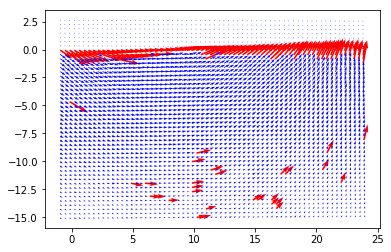

In [21]:
def pixel2world(tform, U, V, X, Y, dt):
    
    pixelX= X.reshape(X.size,1)

    pixelY= Y.reshape(Y.size,1)
    pixelY = numpy.sort(pixelY, axis=0) 
    V= numpy.fliplr(V.reshape(V.size,1))
    #V=numpy.fliplr(V)
    
    pixel = numpy.array([pixelX, pixelY]).astype('float32').transpose()
    xc = numpy.matmul(tform,cv2.convertPointsToHomogeneous(pixel).transpose().reshape(3,x.size))
    worldrec= cv2.convertPointsFromHomogeneous(xc.transpose()) #converting to world coordinates
    #xn = worldrec.shape[0]
    #yn = worldrec.shape[2]
    #xw = worldrec.reshape(xn,yn)[:,0]
    #yw = worldrec.reshape(xn,yn)[:,1]
    xw = worldrec[:,:,0]
    yw = worldrec[:,:,1]
    #linear case, the jacobian is : tform[0:2,0:2]
    Jacl = tform[0:2,0:2]
    
    uv=numpy.matmul(Jacl, numpy.array([U.reshape(U.size,1),V]).astype('float32')[:,:,0])
    #Uw = uv[0].reshape(u.shape[0],u.shape[1])
    #Vw = uv[1].reshape(v.shape[0],v.shape[1])
    un = uv.shape[0]
    vn = uv.shape[1]
    Uw = uv[0,:] #numpy.flip(uv[0,:],0)  
    Vw = -uv[1,:] #numpy.flip(uv[1,:],0)   
    #Uw = (Jacl[0,0]*u + Jacl[0,1]*v  )/dt
    #Vw = (Jacl[1,0]*u + Jacl[1,1]*v  )/dt
    
    return Uw, Vw, xw, yw
uw, vw, xw, yw = pixel2world(tform, u, v, x, y, 0.012)
documentname= 'exprun'+str(runnr)+'.txt'
openpiv.tools.save(xw, yw, uw, vw, mask, documentname) #save the data to an ascii file, for later processing
openpiv.tools.display_vector_field(documentname, scaling_factor=1)#, scale=100, width=0.005)

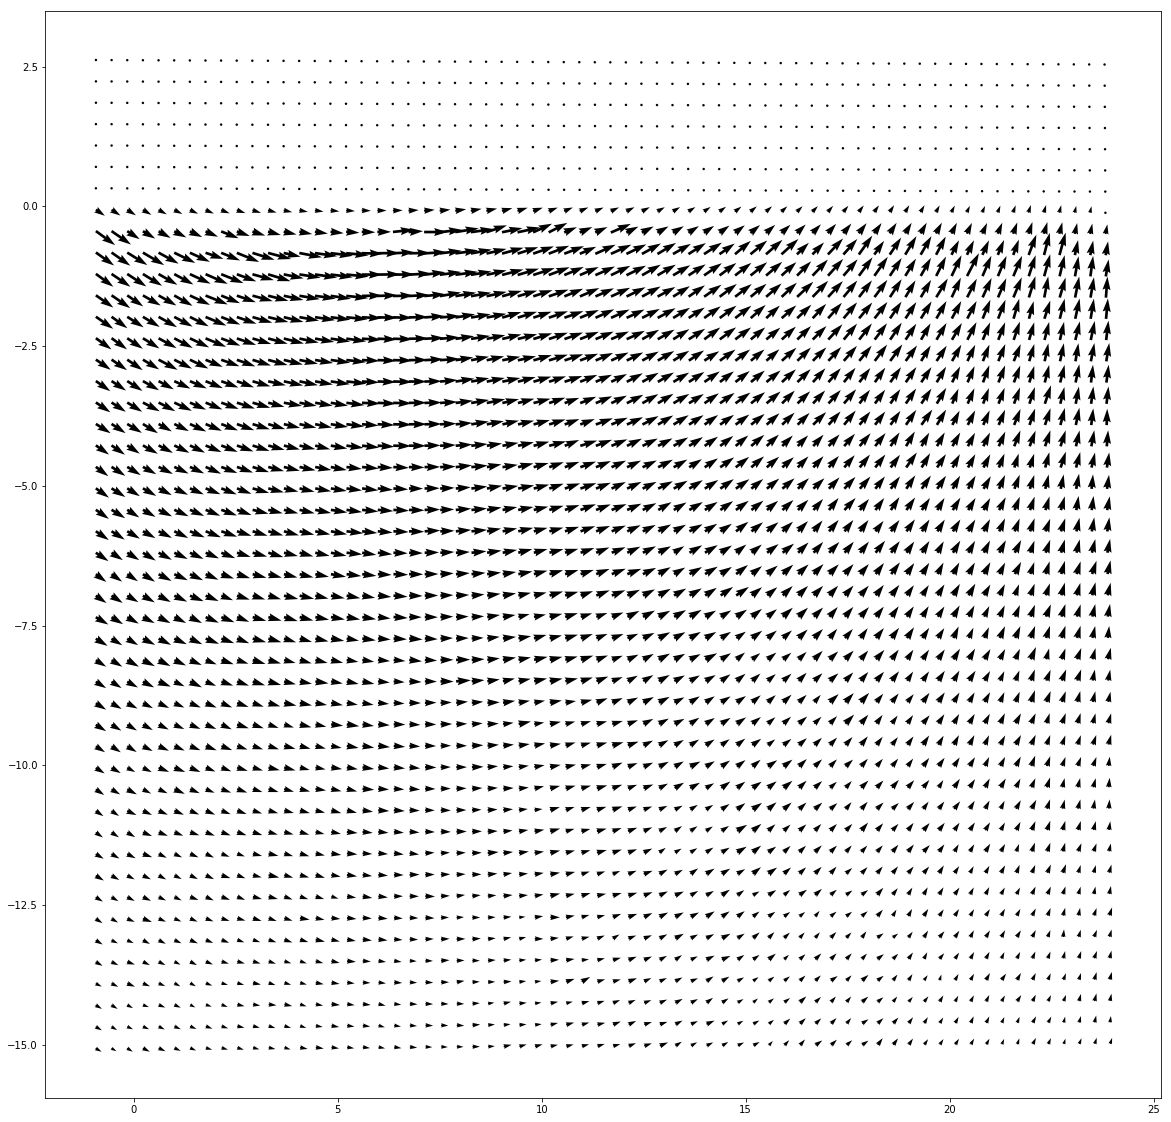

In [22]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( xw, yw, uw, vw)

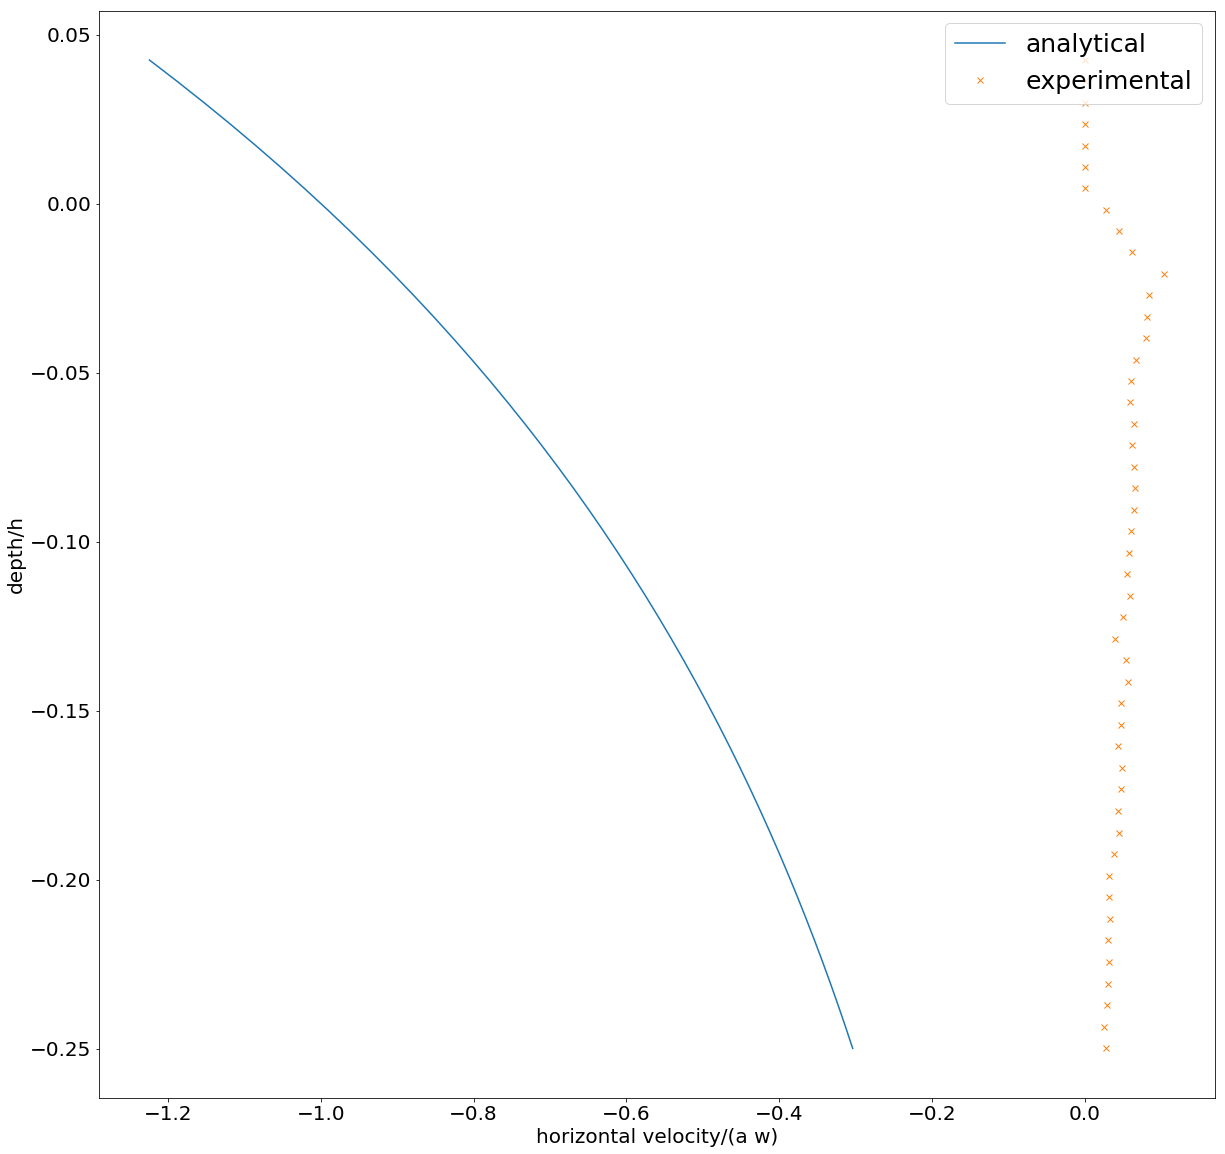

In [27]:
fig = matplotlib.pyplot.figure(figsize=[20,20])
UUw = uw.reshape(u.shape[0],u.shape[1])  #reshaped in u shape
VVw = vw.reshape(v.shape[0],v.shape[1]) 
XXw = xw.reshape(x.shape[0],x.shape[1])
YYw = yw.reshape(y.shape[0],y.shape[1])
abc = numpy.argmax(numpy.sqrt(UUw**2)) # index of crest point
abc = numpy.argmax(numpy.sqrt(UUw**2 + VVw**2)) # index of crest point

#print(abc)
Uw_Crest = uw[abc] #horizontal velocity at crest
#print(uw[464],Uw_Crest)
#print("Values equal Uw_Crest = ", UUw[UUw==Uw_Crest])
indices = numpy.nonzero(UUw == Uw_Crest)  #indices in 2D coordinates
#print("Their indices are ", numpy.nonzero(UUw == Uw_Crest), UUw[numpy.nonzero(UUw == Uw_Crest)], 
#    VVw[numpy.nonzero(UUw == Uw_Crest)], XXw[numpy.nonzero(UUw == Uw_Crest)], YYw[numpy.nonzero(UUw == Uw_Crest)])
#print(indices[0], indices[1])
a = 2.05
w = 2*numpy.pi* 1.425  #8.95
k = 0.0795
h = 0.6*100 # cm
#print(YYw[:, indices[1]])
vs = -a*w*numpy.exp(k*YYw[:, indices[1]])  ##vx = -a*w*exp(k*yw(:,25));
#print(vs)
vw_s = vs/(a*w)    #scaling analytical value 
#plot(vx_s, yw(:,25)/h,  Uw(:,25)/(a*w),yw(:,25)/h,'x')
matplotlib.pyplot.plot( vw_s, YYw[:, indices[1]]/h, UUw[:, indices[1]]/(a*w), YYw[:, indices[1]]/h,'x')
matplotlib.pyplot.legend(['analytical', 'experimental'], fontsize= 25, loc= 1)
matplotlib.pyplot.ylabel('depth/h', fontsize= 20)#, rotation='horizontal')#(r'$\phi_1$', fontsize= 20, rotation='horizontal')
matplotlib.pyplot.xlabel('horizontal velocity/(a w)', fontsize= 20)#(r' $\theta  $ ', fontsize= 20)
matplotlib.pyplot.xticks(size=20)#(-1, 0, 1), ('-1', '0', '1'), color='k', size=20)
matplotlib.pyplot.yticks(size=20)

#matplotlib.pyplot.legend([r'$\frac{m_{11}}{\pi \rho b_0^2}$',r"$\frac{m_{22}}{\pi\rho a_0^2}$",
                         # r"$\frac{m_{66}}{8\pi\rho(a_0^2-b_0^2)^2}$"])
#matplotlib.pyplot.title('Ellipse $b_{0}/a_{0}$ = 0.5')

#fig.savefig('.pdf')
matplotlib.pyplot.show()

In [106]:
numpy.int32?

In [107]:
#cimport numpy 
cimport cython

DTYPEi = numpy.int32
ctypedef numpy.int32_t DTYPEi_t

DTYPEf = numpy.float64
ctypedef numpy.float64_t DTYPEf_t
class CorrelationFunction( ):
    def __init__ ( self, corr ):
        """A class representing a cross correlation function.
        
        Parameters
        ----------
        corr : 2d np.ndarray
            the correlation function array
        
        """
        self.data = corr
        self.shape = self.data.shape
        
        # get first peak
        self.peak1, self.corr_max1 = self._find_peak( self.data )
        
    def _find_peak ( self, array ):
        """Find row and column indices of the highest peak in an array."""    
        ind = array.argmax()
        s = array.shape[1] 
        
        i = ind // s 
        j = ind %  s
        
        return  (i, j),  array.max()
        
    def _find_second_peak ( self, width ):
        """
        Find the value of the second largest peak.
        
        The second largest peak is the height of the peak in 
        the region outside a ``width * width`` submatrix around 
        the first correlation peak.
        
        Parameters
        ----------
        width : int
            the half size of the region around the first correlation 
            peak to ignore for finding the second peak.
              
        Returns
        -------
        i, j : two elements tuple
            the row, column index of the second correlation peak.
            
        corr_max2 : int
            the value of the second correlation peak.
        
        """ 
        # create a masked view of the self.data array
        tmp = self.data.view(numpy.ma.MaskedArray)
        
        # set width x width square submatrix around the first correlation peak as masked.
        # Before check if we are not too close to the boundaries, otherwise we have negative indices
        iini = max(0, self.peak1[0]-width)
        ifin = min(self.peak1[0]+width+1, self.data.shape[0])
        jini = max(0, self.peak1[1]-width)
        jfin = min(self.peak1[1]+width+1, self.data.shape[1])
        tmp[ iini:ifin, jini:jfin ] = numpy.ma.masked
        peak, corr_max2 = self._find_peak( tmp )
        
        return peak, corr_max2  
            
    def subpixel_peak_position( self, method='gaussian' ):
        """
        Find subpixel approximation of the correlation peak.
        
        This function returns a subpixels approximation of the correlation
        peak by using one of the several methods available. 
        
        Parameters
        ----------            
        method : string
             one of the following methods to estimate subpixel location of the peak: 
             'centroid' [replaces default if correlation map is negative], 
             'gaussian' [default if correlation map is positive], 
             'parabolic'.
             
        Returns
        -------
        subp_peak_position : two elements tuple
            the fractional row and column indices for the sub-pixel
            approximation of the correlation peak.
        """
    
        # the peak and its neighbours: left, right, down, up
        try:
            c  = self.data[self.peak1[0]  , self.peak1[1]  ]
            cl = self.data[self.peak1[0]-1, self.peak1[1]  ]
            cr = self.data[self.peak1[0]+1, self.peak1[1]  ]
            cd = self.data[self.peak1[0]  , self.peak1[1]-1] 
            cu = self.data[self.peak1[0]  , self.peak1[1]+1]
        except IndexError:
            # if the peak is near the border do not 
            # do subpixel approximation
            return self.peak1
            
        # if all zero or some is NaN, don't do sub-pixel search:
        tmp = numpy.array([c,cl,cr,cd,cu])
        if numpy.any( numpy.isnan(tmp) ) or numpy.all ( tmp == 0 ):
            return self.peak1
            
        # if correlation is negative near the peak, fall back 
        # to a centroid approximation
        if numpy.any ( tmp  < 0 ) and method == 'gaussian':
            method = 'centroid'
        
        # choose method
        if method == 'centroid':
            subp_peak_position = (((self.peak1[0]-1)*cl+self.peak1[0]*c+(self.peak1[0]+1)*cr)/(cl+c+cr),
                                ((self.peak1[1]-1)*cd+self.peak1[1]*c+(self.peak1[1]+1)*cu)/(cd+c+cu))
    
        elif method == 'gaussian':
            subp_peak_position = (self.peak1[0] + ( (numy.log(cl)-numpy.log(cr) )/( 2*numpy.log(cl) - 4*numpy.log(c) + 2*numpy.log(cr) )),
                                self.peak1[1] + ( (numpy.log(cd)-numpy.log(cu) )/( 2*numpy.log(cd) - 4*numpy.log(c) + 2*numpy.log(cu) ))) 
    
        elif method == 'parabolic':
            subp_peak_position = (self.peak1[0] +  (cl-cr)/(2*cl-4*c+2*cr),
                                    self.peak1[1] +  (cd-cu)/(2*cd-4*c+2*cu)) 
        else:
            raise ValueError( "method not understood. Can be 'gaussian', 'centroid', 'parabolic'." )
        
        return subp_peak_position
        
    def sig2noise_ratio( self, method='peak2peak', width=2 ):
        """Computes the signal to noise ratio.
        
        The signal to noise ratio is computed from the correlation map with
        one of two available method. It is a measure of the quality of the 
        matching between two interogation windows.
        
        Parameters
        ----------
        sig2noise_method: string
            the method for evaluating the signal to noise ratio value from 
            the correlation map. Can be `peak2peak`, `peak2mean` or None
            if no evaluation should be made.
            
        width : int, optional
            the half size of the region around the first
            correlation peak to ignore for finding the second
            peak. [default: 2]. Only used if ``sig2noise_method==peak2peak``.
            
        Returns
        -------
        sig2noise : float 
            the signal to noise ratio from the correlation map.
            
        """

        # if the image is lacking particles, totally black it will correlate to very low value, but not zero
        # return zero, since we have no signal.
        if self.corr_max1 <  1e-3:
            return 0.0
            
        # if the first peak is on the borders, the correlation map is wrong
        # return zero, since we have no signal.
        if ( 0 in self.peak1 or self.data.shape[0] in self.peak1 or self.data.shape[1] in self.peak1):
            return 0.0
        
        # now compute signal to noise ratio
        if method == 'peak2peak':
            # find second peak height
            peak2, corr_max2 = self._find_second_peak( width=width )
            
        elif method == 'peak2mean':
            # find mean of the correlation map
            corr_max2 = self.data.mean()
            
        else:
            raise ValueError('wrong sig2noise_method')
    
        # avoid dividing by zero
        try:
            sig2noise = self.corr_max1/corr_max2
        except ValueError:
            sig2noise = numpy.inf    
            
        return sig2noise

def get_coordinates( image_size, window_size, overlap ):
    """Compute the x, y coordinates of the centers of the interrogation windows.
    
    Parameters
    ----------
    image_size: two elements tuple
        a two dimensional tuple for the pixel size of the image
        first element is number of rows, second element is 
        the number of columns.
        
    window_size: int
        the size of the interrogation windows.
        
    overlap: int
        the number of pixel by which two adjacent interrogation
        windows overlap.
        
        
    Returns
    -------
    x : 2d np.ndarray
        a two dimensional array containing the x coordinates of the 
        interrogation window centers, in pixels.
        
    y : 2d np.ndarray
        a two dimensional array containing the y coordinates of the 
        interrogation window centers, in pixels.
        
    """

    # get shape of the resulting flow field
    field_shape = get_field_shape( image_size, window_size, overlap )

    # compute grid coordinates of the interrogation window centers
    x = numpy.arange( field_shape[1] )*(window_size-overlap) + window_size/2.0
    y = numpy.arange( field_shape[0] )*(window_size-overlap) + window_size/2.0
    
    return np.meshgrid(x,y[::-1])

def get_field_shape ( image_size, window_size, overlap ):
    """Compute the shape of the resulting flow field.
    
    Given the image size, the interrogation window size and
    the overlap size, it is possible to calculate the number 
    of rows and columns of the resulting flow field.
    
    Parameters
    ----------
    image_size: two elements tuple
        a two dimensional tuple for the pixel size of the image
        first element is number of rows, second element is 
        the number of columns.
        
    window_size: int
        the size of the interrogation window.
        
    overlap: int
        the number of pixel by which two adjacent interrogation
        windows overlap.
        
        
    Returns
    -------
    field_shape : two elements tuple
        the shape of the resulting flow field
    """
    
    return ( (image_size[0] - window_size)//(window_size-overlap)+1, 
             (image_size[1] - window_size)//(window_size-overlap)+1 )

def correlate_windows( window_a, window_b, corr_method = 'fft', nfftx = None, nffty = None ):
    """Compute correlation function between two interrogation windows.
    
    The correlation function can be computed by using the correlation 
    theorem to speed up the computation.
    
    Parameters
    ----------
    window_a : 2d np.ndarray
        a two dimensions array for the first interrogation window.
        
    window_b : 2d np.ndarray
        a two dimensions array for the second interrogation window.
        
    corr_method   : string
        one of the two methods currently implemented: 'fft' or 'direct'.
        Default is 'fft', which is much faster.
        
    nfftx   : int
        the size of the 2D FFT in x-direction, 
        [default: 2 x windows_a.shape[0] is recommended].
        
    nffty   : int
        the size of the 2D FFT in y-direction, 
        [default: 2 x windows_a.shape[1] is recommended].
        
        
    Returns
    -------
    corr : 2d np.ndarray
        a two dimensions array for the correlation function.
    
    """
    
    if corr_method == 'fft':
        if nfftx is None:
            nfftx = 2*window_a.shape[0]
        if nffty is None:
            nffty = 2*window_a.shape[1]
        return numpy.fft.fftshift(numpy.fft.irfft2(numpy.fft.rfft2(normalize_intensity(window_a),s=(nfftx,nffty))*numpy.conj(numpy.fft.rfft2(normalize_intensity(window_b),s=(nfftx,nffty)))).real, axes=(0,1)  )
    elif corr_method == 'direct':
        return scipy.signal.convolve(normalize_intensity(window_a), normalize_intensity(window_b[::-1,::-1]), 'full')
    else:
        raise ValueError('method is not implemented')

def normalize_intensity( window ):
    """Normalize interrogation window by removing the mean value.
    
    Parameters
    ----------
    window :  2d np.ndarray
        the interrogation window array
        
    Returns
    -------
    window :  2d np.ndarray
        the interrogation window array, with mean value equal to zero.
    
    """
    return window - window.mean()




def WiDIM( numpy.ndarray[DTYPEi_t, ndim=2] frame_a, 
           numpy.ndarray[DTYPEi_t, ndim=2] frame_b,
           numpy.ndarray[DTYPEi_t, ndim=2] mark,
           int min_window_size,
           float overlap_ratio,
           int coarse_factor,
           float dt,
           str validation_method='mean_velocity',
           int trust_1st_iter=1,
           int validation_iter = 1,
           float tolerance = 1.5,
           int nb_iter_max=3,
           str subpixel_method='gaussian',
           str sig2noise_method='peak2peak',
           int width=2,
           nfftx=None,
           nffty=None):
    """
    Implementation of the WiDIM algorithm (Window Displacement Iterative Method).
    This is an iterative  method to cope with  the lost of pairs due to particles 
    motion and get rid of the limitation in velocity range due to the window size.
    The possibility of window size coarsening is implemented.
    Example : minimum window size of 16*16 pixels and coarse_level of 2 gives a 1st
    iteration with a window size of 64*64 pixels, then 32*32 then 16*16.
        ----Algorithm : At each step, a predictor of the displacement (dp) is applied based on the results of the previous iteration.
                        Each window is correlated with a shifted window.
                        The displacement obtained from this correlation is the residual displacement (dc)
                        The new displacement (d) is obtained with dx = dpx + dcx and dy = dpy + dcy
                        The velocity field is validated and wrong vectors are replaced by mean value of surrounding vectors from the previous iteration (or by bilinear interpolation if the window size of previous iteration was different)
                        The new predictor is obtained by bilinear interpolation of the displacements of the previous iteration:
                            dpx_k+1 = dx_k
    Reference:
        F. Scarano & M. L. Riethmuller, Iterative multigrid approach in PIV image processing with discrete window offset, Experiments in Fluids 26 (1999) 513-523
    
    Parameters
    ----------
    frame_a : 2d np.ndarray, dtype=np.int32
        an two dimensions array of integers containing grey levels of 
        the first frame.
        
    frame_b : 2d np.ndarray, dtype=np.int32
        an two dimensions array of integers containing grey levels of 
        the second frame.
        
    mark : 2d np.ndarray, dtype=np.int32
        an two dimensions array of integers with values 0 for the background, 1 for the flow-field. If the center of a window is on a 0 value the velocity is set to 0.
    min_window_size : int
        the size of the minimum (final) (square) interrogation window.
        
    overlap_ratio : float
        the ratio of overlap between two windows (between 0 and 1).
        
    dt : float
        the time delay separating the two frames.
    
    validation_method : string
        the method used for validation (in addition to the sig2noise method). Only the mean velocity method is implemented now
    
    trust_1st_iter : int = 0 or 1
        0 if the first iteration need to be validated. With a first window size following the 1/4 rule, the 1st iteration can be trusted and the value should be 1 (Default value)
     
    validation_iter : int
        number of iterations per validation cycle.
       
    tolerance : float
        the threshold for the validation method chosen. This does not concern the sig2noise for which the threshold is 1.5; [nb: this could change in the future]
    
    nb_iter_max : int
        global number of iterations.
       
    subpixel_method : string
         one of the following methods to estimate subpixel location of the peak: 
         'centroid' [replaces default if correlation map is negative], 
         'gaussian' [default if correlation map is positive], 
         'parabolic'.
    
    sig2noise_method : string 
        defines the method of signal-to-noise-ratio measure,
        ('peak2peak' or 'peak2mean'. If None, no measure is performed.)
        
    width : int
        the half size of the region around the first
        correlation peak to ignore for finding the second
        peak. [default: 2]. Only used if ``sig2noise_method==peak2peak``.
        
    nfftx   : int
        the size of the 2D FFT in x-direction, 
        [default: 2 x windows_a.shape[0] is recommended]
        
    nffty   : int
        the size of the 2D FFT in y-direction, 
        [default: 2 x windows_a.shape[1] is recommended]
    
    Returns
    -------
    x : 2d np.ndarray
        a two dimensional array containing the x-axis component of the interpolations locations.
        
    y : 2d np.ndarray
        a two dimensional array containing the y-axis component of the interpolations locations.
        
    u : 2d np.ndarray
        a two dimensional array containing the u velocity component,
        in pixels/seconds.
        
    v : 2d np.ndarray
        a two dimensional array containing the v velocity component,
        in pixels/seconds.
        
    mask : 2d np.ndarray
        a two dimensional array containing the boolean values (True for vectors interpolated from previous iteration)
        
    Example
    --------
    
    >>> x,y,u,v, mask = openpiv.process.WiDIM( frame_a, frame_b, mark, min_window_size=16, overlap_ratio=0.25, coarse_factor=2, dt=0.02, validation_method='mean_velocity', trust_1st_iter=1, validation_iter=2, tolerance=0.7, nb_iter_max=4, sig2noise_method='peak2peak')
    --------------------------------------
    Method of implementation : to improve the speed of the programm,
    all data have been placed in the same huge 4-dimensions 'F' array.
    (this prevent the definition of a new array for each iteration)
    However, during the coarsening process a large part of the array is not used.
    Structure of array F:
    --The 1st index is the main iteration (K)   --> length is nb_iter_max
        -- 2nd index (I) is row (of the map of the interpolations locations of iteration K) --> length (effectively used) is Nrow[K]
            --3rd index (J) is column  --> length (effectively used) is Ncol[K]
                --4th index represent the type of data stored at this point:
                            | 0 --> x         |
                            | 1 --> y         | 
                            | 2 --> xb        |
                            | 3 --> yb        | 
                            | 4 --> dx        |
                            | 5 --> dy        | 
                            | 6 --> dpx       |
                            | 7 --> dpy       | 
                            | 8 --> dcx       |
                            | 9 --> dcy       | 
                            | 10 --> u        |
                            | 11 --> v        | 
                            | 12 --> si2noise | 
    Storage of data with indices is not good for comprehension so its very important to comment on each single operation.
    A python dictionary type could have been used (and would be much more intuitive)
    but its equivalent in c language (type map) is very slow compared to a numpy ndarray.
    """

    #initializations
    #warnings.warn("deprecated", RuntimeWarning)
    if nb_iter_max <= coarse_factor:
        raise ValueError( "Please provide a nb_iter_max that is greater than the coarse_level" )
    cdef int K #main iteration index
    cdef int I, J #interrogation locations indices
    cdef int L, M #inside window indices
    cdef int O, P #frame indices corresponding to I and J
    cdef int i, j #dumb indices for various works
    cdef float i_peak, j_peak, mean_u, mean_v, rms_u, rms_v, residual_0
    cdef int residual, nbwind
    cdef numpy.ndarray[DTYPEi_t, ndim=1] Nrow = numpy.zeros(nb_iter_max, dtype=DTYPEi)
    cdef numpy.ndarray[DTYPEi_t, ndim=1] Ncol = numpy.zeros(nb_iter_max, dtype=DTYPEi)
    cdef numpy.ndarray[DTYPEi_t, ndim=1] W = numpy.zeros(nb_iter_max, dtype=DTYPEi)
    cdef numpy.ndarray[DTYPEi_t, ndim=1] Overlap = numpy.zeros(nb_iter_max, dtype=DTYPEi)
    pic_size=frame_a.shape
    #window sizes list initialization
    for K in range(coarse_factor+1):
        W[K]=numpy.power(2,coarse_factor-K)*min_window_size
    for K in range(coarse_factor+1,nb_iter_max):
        W[K]=W[K-1]
    #overlap init
    for K in range(nb_iter_max):
        Overlap[K]=int(numpy.floor(overlap_ratio*W[K]))
    #Ncol and Nrow init
    for K in range(nb_iter_max):
        Nrow[K]=((pic_size[0]-W[K])//(W[K]-Overlap[K]))+1
        Ncol[K]=((pic_size[1]-W[K])//(W[K]-Overlap[K]))+1
    #writting the parameters to the screen
    if validation_iter==0:
        validation_method='None'
    cdef float startTime = launch(method='WiDIM', names=['Size of image', 'total number of iterations', 'overlap ratio', 'coarse factor', 'time step', 'validation method', 'number of validation iterations', 'subpixel_method','Nrow', 'Ncol', 'Window sizes', 'overlaps'], arg=[[pic_size[0], pic_size[1]], nb_iter_max, overlap_ratio, coarse_factor, dt, validation_method, validation_iter,  subpixel_method, Nrow, Ncol, W, Overlap])
    #define the main array F that contains all the data
    cdef numpy.ndarray[DTYPEf_t, ndim=4] F = numpy.zeros([nb_iter_max, Nrow[nb_iter_max-1], Ncol[nb_iter_max-1], 14], dtype=DTYPEf)
    #define mask - bool array don't exist in cython so we go to lower level with cast
    #you can access mask with (<object>mask)[I,J]
    cdef numpy.ndarray[numpy.uint8_t, ndim=2, cast=True] mask = numpy.empty([Nrow[nb_iter_max-1], Ncol[nb_iter_max-1]], dtype=np.bool)
    #define u,v, x,y fields (only used as outputs of this programm)
    cdef numpy.ndarray[DTYPEf_t, ndim=2] u = numpy.zeros([Nrow[nb_iter_max-1], Ncol[nb_iter_max-1]], dtype=DTYPEf)
    cdef numpy.ndarray[DTYPEf_t, ndim=2] v = numpy.zeros([Nrow[nb_iter_max-1], Ncol[nb_iter_max-1]], dtype=DTYPEf)
    cdef numpy.ndarray[DTYPEf_t, ndim=2] x = numpy.zeros([Nrow[nb_iter_max-1], Ncol[nb_iter_max-1]], dtype=DTYPEf)
    cdef numpy.ndarray[DTYPEf_t, ndim=2] y = numpy.zeros([Nrow[nb_iter_max-1], Ncol[nb_iter_max-1]], dtype=DTYPEf)
    #define two small arrays used for the validation process
    cdef numpy.ndarray[DTYPEf_t, ndim=3] neighbours = numpy.zeros([2,3,3], dtype=DTYPEf)
    cdef numpy.ndarray[DTYPEi_t, ndim=2] neighbours_present = numpy.zeros([3,3], dtype=DTYPEi)
    #initialize x and y values
    for K in range(nb_iter_max):
        for I in range(Nrow[K]):
            for J in range(Ncol[K]):
                #x unit vector corresponds to rows
                #y unit vector corresponds to columns
                if I==0:
                    F[K,I,J,0]=W[K]/2 #init x on 1st row
                else:
                    F[K,I,J,0]=F[K,I-1,J,0] + W[K] - Overlap[K] #init x
                if J==0:
                    F[K,I,J,1]=W[K]/2 #init y on first column
                else:
                    F[K,I,J,1]=F[K,I,J-1,1] + W[K] - Overlap[K] #init y
    #end of the initializations
    ####################################################
    #main loop
    for K in range(nb_iter_max):
        print( " ")
        print( "//////////////////////////////////////////////////////////////////")
        print( " ")
        print( "ITERATION # ",K)
        window_a, window_b = define_windows(W[K])
        print( " ")
        #a simple progress bar
        widgets = ['Computing the displacements : ', Percentage(), ' ', Bar(marker='-',left='[',right=']'),
           ' ', ETA(), ' ', FileTransferSpeed()]
        pbar = ProgressBar(widgets=widgets, maxval=100)
        pbar.start()
        residual = 0
        for I in range(Nrow[K]):#run through interpolations locations
            pbar.update(100*I/Nrow[K])#progress update
            for J in range(Ncol[K]):
                
                #compute xb, yb:
                F[K,I,J,2]=numpy.floor(F[K,I,J,0]+F[K,I,J,6])#xb=xa+dpx
                F[K,I,J,3]=numpy.floor(F[K,I,J,1]+F[K,I,J,7])#yb=yb+dpy
                #look for corrupted window (ie. going outside of the picture) and relocate them with 0 displacement:
                if F[K,I,J,2] + W[K]/2 > pic_size[0]-1 or F[K,I,J,2] - W[K]/2 < 0: #if corrupted on x-axis do:
                    F[K,I,J,2]=F[K,I,J,0]#xb=x
                    F[K,I,J,3]=F[K,I,J,1]#yb=y
                    F[K,I,J,6]=0.0#dpx=0
                    F[K,I,J,7]=0.0#dpy=0
                elif F[K,I,J,3] + W[K]/2 > pic_size[1]-1 or F[K,I,J,3] - W[K]/2 < 0: #if corrupted on y-axis do the same
                    F[K,I,J,2]=F[K,I,J,0]#xb=x
                    F[K,I,J,3]=F[K,I,J,1]#yb=y
                    F[K,I,J,6]=0.0#dpx=0
                    F[K,I,J,7]=0.0#dpy=0
                #fill windows a and b
                for L in range(W[K]):
                    for M in range(W[K]):
                        window_a[L,M]=frame_a[F[K,I,J,0] - W[K]/2 + L, F[K,I,J,1] - W[K]/2 + M]
                        window_b[L,M]=frame_b[F[K,I,J,2] - W[K]/2 + L, F[K,I,J,3] - W[K]/2 + M]
                #perform correlation of the two windows
                corr = correlate_windows( window_b, window_a, nfftx=nfftx, nffty=nffty )
                c = CorrelationFunction( corr )
                F[K,I,J,12] = c.sig2noise_ratio( sig2noise_method, width )#compute sig2noise
                i_peak, j_peak = c.subpixel_peak_position( subpixel_method )#get peak position
                if numpy.any(numpy.isnan((i_peak, j_peak))) or mark[F[K,I,J,0], F[K,I,J,1]] == 0:#prevent 'Not a Number' peak location
                #if np.any(np.isnan((i_peak, j_peak))):
                    F[K,I,J,8]=0.0
                    F[K,I,J,9]=0.0
                else:
                    #find residual displacement dcx and dcy
                    F[K,I,J,8]=i_peak - corr.shape[0]/2#dcx
                    F[K,I,J,9]=j_peak - corr.shape[1]/2#dcy
                residual = residual + np.sqrt(F[K,I,J,8]*F[K,I,J,8]+F[K,I,J,9]*F[K,I,J,9])
                #get new displacement prediction
                F[K,I,J,4]=F[K,I,J,6]+F[K,I,J,8]#dx=dpx+dcx
                F[K,I,J,5]=F[K,I,J,7]+F[K,I,J,9]#dy=dpy+dcy
                #get new velocity vectors
                F[K,I,J,10]=F[K,I,J,5] / dt #u=dy/dt
                F[K,I,J,11]=-F[K,I,J,4] / dt #v=-dx/dt
        pbar.finish()#close progress bar
        print( "..[DONE]")
        if K==0:
            residual_0 = residual/numpy.float(Nrow[K]*Ncol[K])
        print( " --residual : ", (residual/numpy.float(Nrow[K]*Ncol[K]))/residual_0)
        #####################################################
        #validation of the velocity vectors with 3*3 filtering
        if K==0 and trust_1st_iter:#1st iteration can generally be trust if it follows the 1/4 rule
            print("no validation : trusting 1st iteration")
        else: 
            print( "Starting validation..")
            for I in range(Nrow[nb_iter_max-1]):#init mask to False
                for J in range(Ncol[nb_iter_max-1]):
                    (<object>mask)[I,J]=False
            for i in range(validation_iter):#real validation starts
                print( "Validation, iteration number ",i)
                print( " ")
                widgets = ['Validation : ', Percentage(), ' ', Bar(marker='-',left='[',right=']'),
           ' ', ETA(), ' ', FileTransferSpeed()]
                pbar = ProgressBar(widgets=widgets, maxval=100)
                pbar.start()
                for I in range(Nrow[K]):#run through locations
                    pbar.update(100*I/Nrow[K])                    
                    for J in range(Ncol[K]):
                        neighbours_present = find_neighbours(I, J, Nrow[K]-1, Ncol[K]-1)#get a map of the neighbouring locations
                        for L in range(3):#get the velocity of the neighbours in a 2*3*3 array
                            for M in range(3):
                                if neighbours_present[L,M]:
                                    neighbours[0,L,M]=F[K,I+L-1,J+M-1,10]#u
                                    neighbours[1,L,M]=F[K,I+L-1,J+M-1,11]#v
                                else:
                                    neighbours[0,L,M]=0
                                    neighbours[1,L,M]=0
                            if numpy.sum(neighbours_present) !=0 and mark[F[K,I,J,0], F[K,I,J,1]] == 1:
                            #if np.sum(neighbours_present):
                                mean_u = numpy.sum(neighbours[0])/numpy.float(numpy.sum(neighbours_present))#computing the mean velocity
                                mean_v = numpy.sum(neighbours[1])/numpy.float(numpy.sum(neighbours_present))
                                if F[K,I,J,12] < 1.5:#validation with the sig2noise ratio, 1.5 is a recommended minimum value
                                    if K==0:#if in 1st iteration, no interpolation is needed so just replace by the mean
                                        F[K,I,J,10] = mean_u
                                        F[K,I,J,11] = mean_v
                                        (<object>mask)[I,J]=True
                                        F[K,I,J,4] = -F[K,I,J,11]*dt#recompute displacement from velocity
                                        F[K,I,J,5] = F[K,I,J,10]*dt
                                    elif K>0 and (Nrow[K] != Nrow[K-1] or Ncol[K] != Ncol[K-1]):#perform interpolation using previous iteration (which is supposed to be already validated -> this prevents error propagation)
                                        F[K,I,J,10] = interpolate_surroundings(F,Nrow,Ncol,K-1,I,J, 10)
                                        F[K,I,J,11] = interpolate_surroundings(F,Nrow,Ncol,K-1,I,J, 11)
                                if validation_method=='mean_velocity':#add a validation with the mean and rms values
                                    rms_u = numpy.sqrt(sumsquare_array(neighbours[0])/numpy.float(numpy.sum(neighbours_present)))#get rms of u
                                    rms_v = numpy.sqrt(sumsquare_array(neighbours[1])/numpy.float(numpy.sum(neighbours_present)))
                                    if rms_u==0 or rms_v==0:
                                            F[K,I,J,10] = mean_u
                                            F[K,I,J,11] = mean_v
                                    elif ((F[K,I,J,10] - mean_u)/rms_u) > tolerance or ((F[K,I,J,11] - mean_v)/rms_v) > tolerance:
                                        if K==0:
                                            F[K,I,J,10] = mean_u
                                            F[K,I,J,11] = mean_v
                                            (<object>mask)[I,J]=True
                                            F[K,I,J,4] = -F[K,I,J,11]*dt
                                            F[K,I,J,5] = F[K,I,J,10]*dt
                                        elif K>0 and (Nrow[K] != Nrow[K-1] or Ncol[K] != Ncol[K-1]):#case if different dimensions : interpolation using previous iteration
                                            F[K,I,J,10] = interpolate_surroundings(F,Nrow,Ncol,K-1,I,J, 10)
                                            F[K,I,J,11] = interpolate_surroundings(F,Nrow,Ncol,K-1,I,J, 11)
                                            (<object>mask)[I,J]=True
                                            F[K,I,J,4] = -F[K,I,J,11]*dt
                                            F[K,I,J,5] = F[K,I,J,10]*dt
                                        elif K>0 and (Nrow[K] == Nrow[K-1] or Ncol[K] == Ncol[K-1]):#case if same dimensions
                                            for L in range(3):
                                                for M in range(3):
                                                    if neighbours_present[L,M]:
                                                        neighbours[0,L,M]=F[K-1,I+L-1,J+M-1,10]#u
                                                        neighbours[1,L,M]=F[K-1,I+L-1,J+M-1,11]#v
                                                    else:
                                                        neighbours[0,L,M]=0
                                                        neighbours[1,L,M]=0
                                            if numpy.sum(neighbours_present) !=0:
                                                mean_u = numpy.sum(neighbours[0])/numpy.float(numpy.sum(neighbours_present))
                                                mean_v = numpy.sum(neighbours[1])/numpy.float(numpy.sum(neighbours_present))
                                                F[K,I,J,10] = mean_u
                                                F[K,I,J,11] = mean_v
                                                (<object>mask)[I,J]=True
                                                F[K,I,J,4] = -F[K,I,J,11]*dt
                                                F[K,I,J,5] = F[K,I,J,10]*dt
            pbar.finish()                    
            print( "..[DONE]")
            print( " ")
        #end of validation
        ##############################################################################
        #stop process if this is the last iteration
        if K==nb_iter_max-1:
            print( "//////////////////////////////////////////////////////////////////")
            print( "end of iterative process.. Re-arranging vector fields..")
            for I in range(Nrow[K]):#assembling the u,v and x,y fields for outputs
                for J in range(Ncol[K]):
                    x[I,J]=F[K,I,J,1]
                    y[I,J]=F[K,Nrow[K]-I-1,J,0]
                    u[I,J]=F[K,I,J,10]
                    v[I,J]=F[K,I,J,11]
            print("...[DONE]")
            end(startTime)
            return x, y, u, v, (<object>mask)
        #############################################################################
        #go to next iteration : compute the predictors dpx and dpy from the current displacements
        print( "going to next iteration.. ")
        print( "performing interpolation of the displacement field")
        print( " ")
        widgets = ['Performing interpolations : ', Percentage(), ' ', Bar(marker='-',left='[',right=']'),
           ' ', ETA(), ' ', FileTransferSpeed()]
        pbar = progressbar.ProgressBar(widgets=widgets, maxval=100)
        pbar.start()
        for I in range(Nrow[K+1]):
            pbar.update(100*I/Nrow[K+1])
            for J in range(Ncol[K+1]):
                if Nrow[K+1]==Nrow[K] and Ncol[K+1]==Ncol[K]:
                    F[K+1,I,J,6] = F[K,I,J,4]#dpx_k+1 = dx_k 
                    F[K+1,I,J,7] = F[K,I,J,5]#dpy_k+1 = dy_k
                else:#interpolate if dimensions do not agree
                    F[K+1,I,J,6] = interpolate_surroundings(F,Nrow,Ncol,K,I,J, 4)
                    F[K+1,I,J,7] = interpolate_surroundings(F,Nrow,Ncol,K,I,J, 5)
        pbar.finish()
        print( "..[DONE] -----> going to iteration ",K+1)
        print( " ")









def interpolate_surroundings(numpy.ndarray[DTYPEf_t, ndim=4] F,
                             numpy.ndarray[DTYPEi_t, ndim=1] Nrow,
                             numpy.ndarray[DTYPEi_t, ndim=1] Ncol,
                             int K,
                             int I,
                             int J,
                             int dat):
    """Perform interpolation of between to iterations of the F 4d-array for a specific location I,J and the data type dat.
    
    Parameters
    ----------
    F :  4d np.ndarray
        The main array of the WIDIM algorithm.
    Nrow : 1d np.ndarray
        list of the numbers of row for each iteration K
       
    Ncol : 1d np.ndarray
        list of the numbers of column for each iteration K
    
    K : int
        the iteration that contains the valid data. K+1 will be the iteration at which the interpolation is needed.
    
    I,J : int
        indices of the point that need interpolation (in iteration K+1)
    
    dat : int
        the index of the data to interpolate.
    
    Returns
    -------
    the interpolated data (type float)
    
    """
    #interpolate data dat from previous iteration
    cdef float lower_lim_previous_x = F[K,0,0,0]
    cdef float lower_lim_previous_y = F[K,0,0,1]
    cdef float upper_lim_previous_x = F[K,Nrow[K]-1,Ncol[K]-1,0]
    cdef float upper_lim_previous_y = F[K,Nrow[K]-1,Ncol[K]-1,1]
    cdef float pos_now_x = F[K+1,I,J,0]
    cdef float pos_now_y = F[K+1,I,J,1]
    cdef numpy.ndarray[DTYPEi_t, ndim=1] Q1 = numpy.zeros(2, dtype=DTYPEi)
    cdef numpy.ndarray[DTYPEi_t, ndim=1] Q4 = numpy.zeros(2, dtype=DTYPEi)
    if pos_now_x < lower_lim_previous_x:#top row
        if pos_now_y < lower_lim_previous_y:#top left corner
            return F[K,0,0,dat]
        elif pos_now_y > upper_lim_previous_y:#top right corner
            return F[K,0,Ncol[K]-1,dat]
        else:#top row no corners
            low_y, high_y = F_dichotomy(F,K,Ncol,'y_axis',pos_now_y)
            if low_y == high_y:
                return F[K,0,low_y,dat]
            else:
                return linear_interpolation(F[K,0,low_y,1], F[K,0,high_y,1], pos_now_y, F[K,0,low_y,dat], F[K,0,high_y,dat])
    elif pos_now_x > upper_lim_previous_x:#bottom row
        if pos_now_y < lower_lim_previous_y:#bottom left corner
            return F[K,Nrow[K]-1,0,dat]
        elif pos_now_y > upper_lim_previous_y:#bottom right corner
            return F[K,Nrow[K]-1,Ncol[K]-1,dat]
        else:#bottom row no corners
            low_y, high_y = F_dichotomy(F,K,Ncol,'y_axis',pos_now_y)
            #print low_y, high_y
            if low_y == high_y:
                return F[K,Nrow[K]-1,low_y,dat]
            else:
                return linear_interpolation(F[K,0,low_y,1], F[K,0,high_y,1], pos_now_y, F[K,Nrow[K]-1,low_y,dat], F[K,Nrow[K]-1,high_y,dat])
    elif pos_now_y < lower_lim_previous_y:#left column no corners
        low_x, high_x = F_dichotomy(F,K,Nrow,'x_axis',pos_now_x)
        if low_x == high_x:
            return F[K,low_x,0,dat]
        else:
            return linear_interpolation(F[K,low_x,0,0], F[K,high_x,0,0], pos_now_x, F[K,low_x,0,dat], F[K,high_x,0,dat])
    elif pos_now_y > upper_lim_previous_y:#right column no corners
        low_x, high_x = F_dichotomy(F,K,Nrow,'x_axis',pos_now_x)
        if low_x == high_x:
            return F[K,low_x,Ncol[K]-1,dat]
        else:
            return linear_interpolation(F[K,low_x,0,0], F[K,high_x,0,0], pos_now_x, F[K,low_x,Ncol[K]-1,dat], F[K,high_x,Ncol[K]-1,dat])
    else:#interior grid
        low_x, high_x = F_dichotomy(F,K,Nrow,'x_axis',pos_now_x)
        low_y, high_y = F_dichotomy(F,K,Ncol,'y_axis',pos_now_y)
        Q1[0] = F[K,low_x,0,0] 
        Q1[1] = F[K,0,low_y,1]
        Q4[0] = F[K,high_x,0,0]
        Q4[1] = F[K,0,high_y,1]
        if pos_now_x >= Q1[0] and pos_now_x <= Q4[0] and pos_now_y >= Q1[1] and pos_now_y <= Q4[1]:
            return bilinear_interpolation(Q1[0],Q4[0],Q1[1],Q4[1],pos_now_x,pos_now_y,F[K,low_x,low_y,dat],F[K,low_x,high_y,dat],F[K,high_x,low_y,dat],F[K,high_x,high_y,dat])
        else:
            raise ValueError( "cannot perform interpolation, a problem occured" )


SyntaxError: invalid syntax (<ipython-input-107-df3e2168c626>, line 2)